# Лабораторная работа №2

## Выполнил студент группы 18-ИВТ-3 Кожакин Руслан Алексеевич

### Вариант №26, набор данных №4 Iris, классификаторы 2 и 4. 

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
x = pd.read_csv('iris.data.txt', names=['SepalLength(cm)', 'SepalWidth(cm)', 'PetalLength(cm)', 'PetalWidth(cm)', 'Species'])
df = pd.DataFrame(x)
df

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


***
### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


1. SepalLengthCm - длина чашелистника (см)
2. SepalWidthCm - ширина чашелистника (см)
3. PetalLengthCm - длина лепестка (см)
4. PetalWidthCm - ширина лепестка (см)
5. Species - вид 
    - iris-setosa
    - iris-versicolour
    - iris-virginica

***
### 2. Удалите дубликаты строк в наборе данных, приведите размер набора данных до и после данной операции.

In [3]:
df.shape

(150, 5)

In [4]:
df = df.drop_duplicates()
df.shape

(147, 5)

Было удалено 3 дубликата.

***
### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

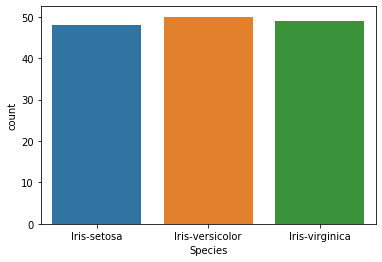

In [5]:
sns.countplot(data=df, x='Species')
plt.show()

Классы сбалансированы, так как объем данных примерно одинаковв каждом классе. ROC кривая не будет иметь проблем.

***
### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

График до масштабирования:

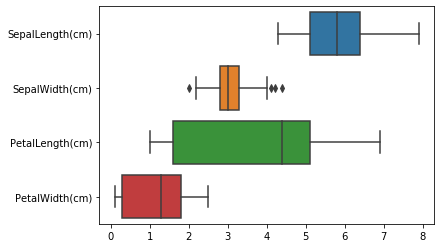

In [6]:
numerical_columns = ['SepalLength(cm)', 'SepalWidth(cm)', 'PetalLength(cm)', 'PetalWidth(cm)']
sns.boxplot(data = df[numerical_columns], orient="h")
plt.show()

Масштабирование данных будем выполнять с помощью нормализации (0;1).

График после масштабирования:

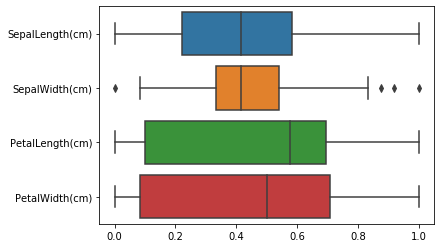

In [7]:
scal = preprocessing.MinMaxScaler()
df[numerical_columns] = scal.fit_transform(df[numerical_columns])
sns.boxplot(data=df[numerical_columns], orient="h")
plt.show()

***
### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

In [8]:
change = LabelEncoder() 
df['Species'] = change.fit_transform(df['Species'])
df

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Выбрали способ замены с помощью LabelEncoding, который преобразовал Species в числа 0, 1, 2.

***
### 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других.

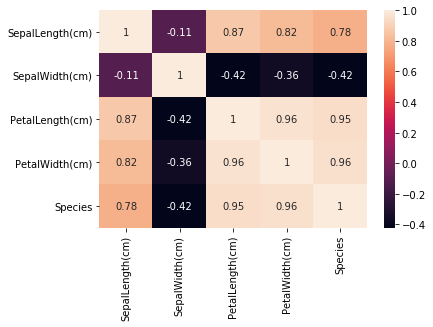

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

***
### 7. Заполните пропущенные значения в данных.


In [10]:
df.shape

(147, 5)

In [11]:
df.dropna()
df.shape

(147, 5)

Пропущенных значений в данных нет.

***
### 8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [12]:
X = np.array(df.drop('Species', axis=1))
Y = np.array(df['Species']) 
Y = label_binarize(Y, classes=[x for x in range(3)])
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 0)

1.Radius Neighbors Classifier - классификатор k-ближайших соседей(задаётся радиус для выбора ближайших объектов).

In [13]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(0.5, 1, 20)[1:],
         'leaf_size': np.linspace(1, 2, 20)[1:]}
rncGrid = GridSearchCV(rnc, params)
rncGrid.fit(X_train, y_train)
y_score = rncGrid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Best score: %.2f' % (rncGrid.best_score_))
print('Accuracy rnc: %.2f' % accuracy_score(y_score, y_test))

Best score: 0.87
Accuracy rnc: 0.89


PR и ROC кривые для Radius Neighbors Classifier:

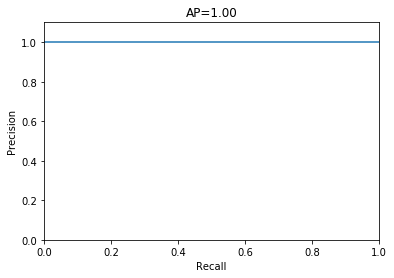

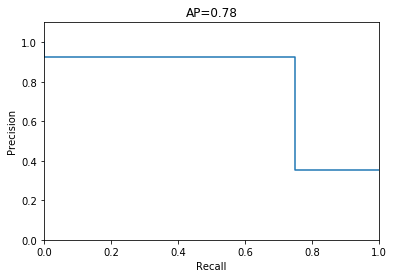

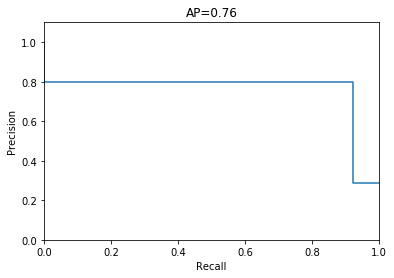

In [14]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.title(
        'AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

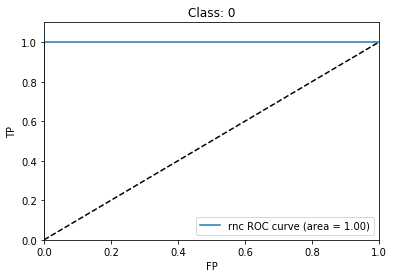

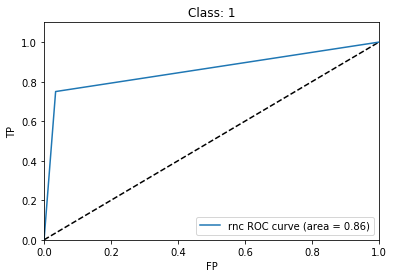

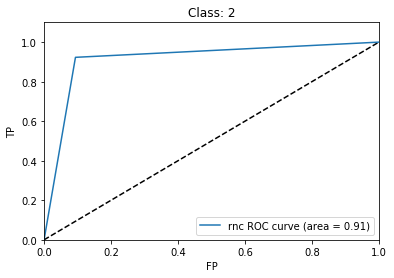

In [15]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %.2f)' % ('rnc', roc_auc[i]))  
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('Class: {}'.format(i))
    plt.legend(loc=4)
    plt.show()

2.Decision Tree Classifier - логический классификатор (бинарное решающее дерево).

In [16]:
dtc = DecisionTreeClassifier()

search = GridSearchCV(dtc, {'max_depth': [x for x in range(1, 50)]})
search.fit(X_train, y_train)

n = search.best_estimator_.max_depth
best = search.best_score_
print('best score: %.2f' % best)

dtc = DecisionTreeClassifier(max_depth=n)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
y_score = search.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Accuracy dtc: %.2f' % accuracy_score(y_test, dtc_predict))


best score: 0.94
Accuracy dtc: 0.96


PR и ROC кривые для Decision Tree Classifier:

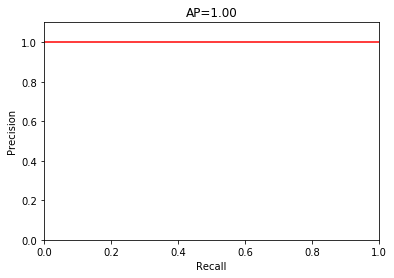

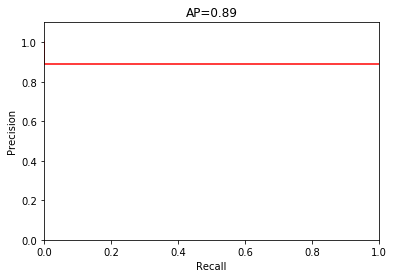

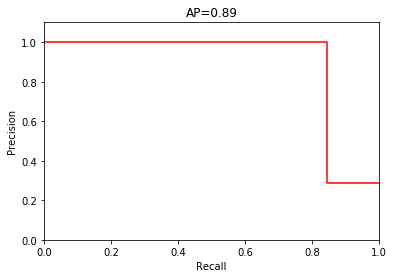

In [17]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], where='post', color='r')
    

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.title(
        'AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

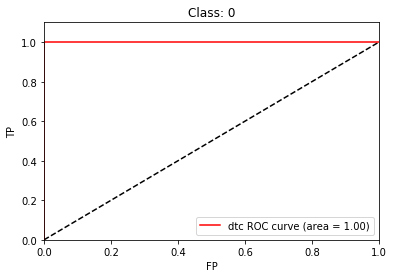

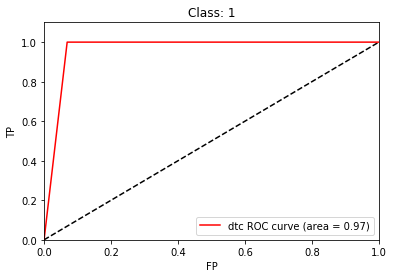

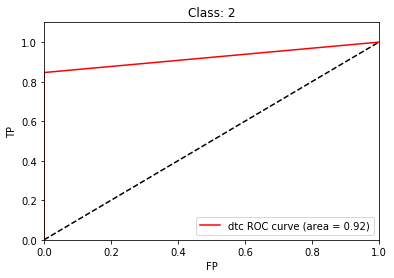

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %.2f)' % ('dtc', roc_auc[i]), color='r')  
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('Class: {}'.format(i))
    plt.legend(loc=4)
    plt.show()

***
### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.
Вывод: При рассмотрении PR и ROC кривых можно сделать вывод, что классификатор RNC и DTC имеют примерно одинаковые показатели качества.